In [1]:
import numpy as np

### Bag of Words Construction

In [2]:
texts = []
texts.append('Hello everyone. How are you doing?  Today is a sunny day.')
texts.append("How's everyone doing, today?  It is not sunny today.")
texts

['Hello everyone. How are you doing?  Today is a sunny day.',
 "How's everyone doing, today?  It is not sunny today."]

In [3]:
# Python code to count frequency
def get_word_counts(words):
    word_counts = {}
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts

In [4]:
from nltk.tokenize import word_tokenize 
vocab_set = set()
bow = []
for text in texts:
    tokens = word_tokenize(text)
    vocab_set.update(tokens)
    bow.append(get_word_counts(tokens))

print(vocab_set)
print(bow)

{'sunny', 'It', 'doing', "'s", '.', 'How', ',', 'today', '?', 'not', 'is', 'Today', 'Hello', 'are', 'a', 'day', 'everyone', 'you'}
[{'Hello': 1, 'everyone': 1, '.': 2, 'How': 1, 'are': 1, 'you': 1, 'doing': 1, '?': 1, 'Today': 1, 'is': 1, 'a': 1, 'sunny': 1, 'day': 1}, {'How': 1, "'s": 1, 'everyone': 1, 'doing': 1, ',': 1, 'today': 2, '?': 1, 'It': 1, 'is': 1, 'not': 1, 'sunny': 1, '.': 1}]


In [5]:
# Use CountVectorizer to count frequency
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

vector = vectorizer.fit_transform(texts)
print(vector.shape)
print(vector)
print(vectorizer.vocabulary_)

print("Vocabulary:", vectorizer.get_feature_names_out())
print("BoW:", vector.toarray())

(2, 12)
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 18 stored elements and shape (2, 12)>
  Coords	Values
  (0, 4)	1
  (0, 3)	1
  (0, 5)	1
  (0, 0)	1
  (0, 11)	1
  (0, 2)	1
  (0, 10)	1
  (0, 6)	1
  (0, 9)	1
  (0, 1)	1
  (1, 3)	1
  (1, 5)	1
  (1, 2)	1
  (1, 10)	2
  (1, 6)	1
  (1, 9)	1
  (1, 7)	1
  (1, 8)	1
{'hello': 4, 'everyone': 3, 'how': 5, 'are': 0, 'you': 11, 'doing': 2, 'today': 10, 'is': 6, 'sunny': 9, 'day': 1, 'it': 7, 'not': 8}
Vocabulary: ['are' 'day' 'doing' 'everyone' 'hello' 'how' 'is' 'it' 'not' 'sunny'
 'today' 'you']
BoW: [[1 1 1 1 1 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 1 1 1 1 2 0]]


In [6]:
# Can add new text to count frequency using the existing CountVectorizer()
new_text = ['Rise and shine, everyone!  It is a special day today.']
vector = vectorizer.transform(new_text)
print(vector.toarray())

[[0 1 0 1 0 0 1 1 0 0 1 0]]


### Word Embeddings: CBOW

In [7]:
texts = []
texts.append('A man lives with two cats and a dog in his apartment.')
texts.append('Inside his apartment, there are a bed, a table and four chairs.')
texts.append('The man is sleeping on the bed.')
texts.append('One cat stands on the table.')
texts.append('The other cat sits on one chair.')
texts.append('The dog sleeps on the floor.')

In [8]:
print(texts)

['A man lives with two cats and a dog in his apartment.', 'Inside his apartment, there are a bed, a table and four chairs.', 'The man is sleeping on the bed.', 'One cat stands on the table.', 'The other cat sits on one chair.', 'The dog sleeps on the floor.']


In [9]:
from nltk.corpus import stopwords
corpus_stop_words = set(stopwords.words('english'))

In [10]:
# Note that Word2Vec takes nested list of words as first paarameter

# Preprocess sentences 
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

word_tokens = []
lemmatizer = WordNetLemmatizer()
for text in texts:
    temp_tokens = [word.lower() for word in word_tokenize(text)]
    temp_tokens = [re.sub(r'[^\w\s]', '', token) for token in temp_tokens if re.sub(r'[^\w\s]', '', token)]
    temp_tokens = [word for word in temp_tokens if not word.lower() in corpus_stop_words]
    temp_tokens = [lemmatizer.lemmatize(word) for word in temp_tokens]
    word_tokens.append(temp_tokens)
word_tokens

[['man', 'life', 'two', 'cat', 'dog', 'apartment'],
 ['inside', 'apartment', 'bed', 'table', 'four', 'chair'],
 ['man', 'sleeping', 'bed'],
 ['one', 'cat', 'stand', 'table'],
 ['cat', 'sits', 'one', 'chair'],
 ['dog', 'sleep', 'floor']]

In [12]:
# Run Word2Vec Using CBOW

# Note that Word2Vec takes nested list of words as first paarameter
# vector_size (int, optional) – Dimensionality of the word vectors.
# window (int, optional) – Maximum distance between the current and predicted word within a sentence.
# min_count (int, optional) – Ignores all words with total frequency lower than this.
# sg ({0, 1}, optional) – 1 = skip gram, 0 = CBOW
from gensim.models import Word2Vec
w2v_model = Word2Vec(word_tokens, vector_size=10, window=3, min_count=1)

In [13]:
# Get all possible words from Word2Vec model 
w2v_vocab_list = list(w2v_model.wv.key_to_index.keys())
w2v_vocab_list

['cat',
 'table',
 'chair',
 'dog',
 'apartment',
 'bed',
 'man',
 'one',
 'four',
 'sleep',
 'sleeping',
 'inside',
 'stand',
 'sits',
 'two',
 'life',
 'floor']

In [14]:
# Get word embedding for a specific words
# Size of vector = vector_size value specficied in Word2Vec model 
w2v_model.wv['cat']

array([-0.00536227,  0.00236431,  0.0510335 ,  0.09009273, -0.0930295 ,
       -0.07116809,  0.06458873,  0.08972988, -0.05015428, -0.03763372],
      dtype=float32)

In [15]:
# See similarity between two words
# Note this similarity is computed based on word-embedding values, not cosine similarity
print(w2v_model.wv.similarity('cat', 'man'))

-0.18973823


In [16]:
# See similarity between two words
print(w2v_model.wv.similarity('cat', 'dog'))

0.10494352


In [17]:
# See a list of top 10 most positively similar word to cat (default size of list = 10)
w2v_model.wv.most_similar(positive=['cat'])

[('table', 0.5435707569122314),
 ('sleeping', 0.43179112672805786),
 ('four', 0.3792896568775177),
 ('chair', 0.3004136085510254),
 ('inside', 0.22745124995708466),
 ('life', 0.15579193830490112),
 ('dog', 0.10494352877140045),
 ('one', -0.13101786375045776),
 ('man', -0.1897382140159607),
 ('two', -0.2055797278881073)]

In [18]:
# See a list of top 10 most negatively similar word to cat (default size of list = 10)
w2v_model.wv.most_similar(negative=['cat'])

[('sleep', 0.7287455797195435),
 ('floor', 0.5182236433029175),
 ('stand', 0.3794037997722626),
 ('bed', 0.27261465787887573),
 ('sits', 0.23750293254852295),
 ('apartment', 0.22420455515384674),
 ('two', 0.2055797278881073),
 ('man', 0.1897382140159607),
 ('one', 0.13101786375045776),
 ('dog', -0.10494352877140045)]

In [19]:
# See a list of top 5 most positively similar word to dog
w2v_model.wv.most_similar(positive=['dog'], topn=5)

[('one', 0.2940695285797119),
 ('floor', 0.28965628147125244),
 ('four', 0.20713211596012115),
 ('sleeping', 0.19899128377437592),
 ('cat', 0.10494355112314224)]

In [20]:
# See a list of top 5 most negatively similar word to dog
w2v_model.wv.most_similar(negative=['dog'], topn=5)

[('apartment', 0.36625364422798157),
 ('inside', 0.3106391131877899),
 ('two', 0.30105289816856384),
 ('life', 0.2512204647064209),
 ('sleep', 0.2315719872713089)]

In [21]:
# Select word that least match the remaining words in the list
print(w2v_model.wv.doesnt_match(['dog', 'man', 'cat']))

man


In [22]:
# Select word that least match the remaining words in the list
print(w2v_model.wv.doesnt_match(['bed', 'chairs', 'table']))

bed


In [23]:
# Select word that least match the remaining words in the list
print(w2v_model.wv.doesnt_match(['dog', 'bed', 'chairs', 'table']))

table


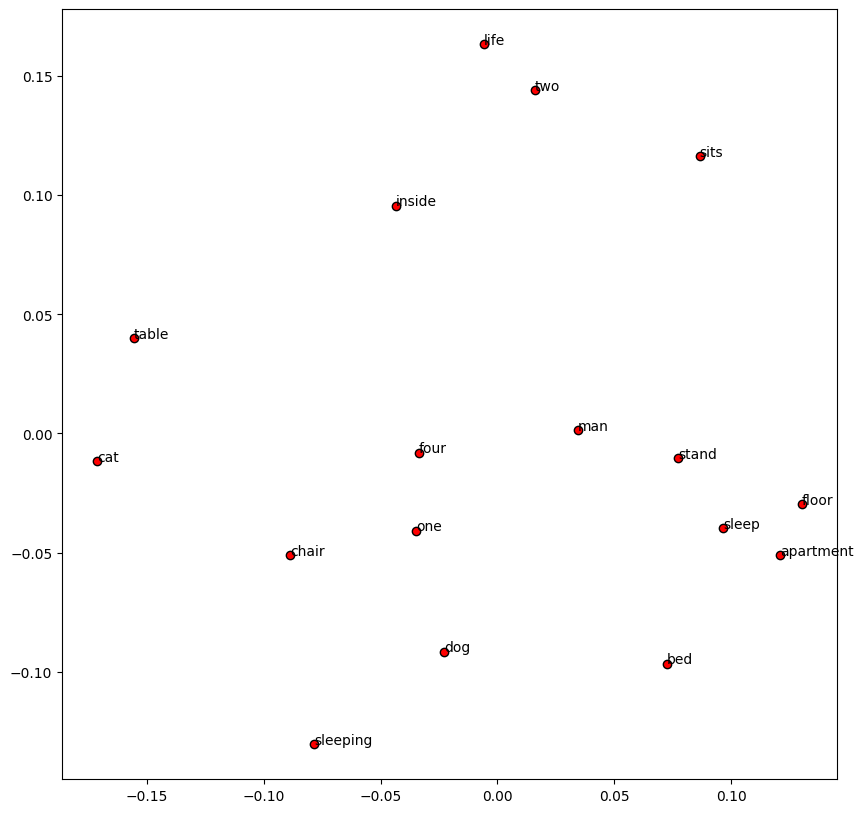

In [24]:
# Plot similarities between each word 

# Source: https://medium.com/@manansuri/a-dummys-guide-to-word2vec-456444f3c673
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(10,10))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        #plt.text(x+0.05, y+0.05, word)
        plt.text(x, y, word)
    plt.show()

display_pca_scatterplot(w2v_model.wv, w2v_vocab_list)

In [25]:
# Model can be saved and reload to use later
w2v_model.save('word2vec_model_cbow')

#### Load and Continue Training the Pre-Trained Model

In [26]:
# Load the previously-saved model
new_w2v_model = Word2Vec.load('word2vec_model_cbow')

In [27]:
# Prepare more texts to add to the existing model
new_texts = ['The man brings three fishes into the apartment']
for new_text in new_texts:
    new_tokens = [word for word in word_tokenize(new_text)]
print(new_tokens)

['The', 'man', 'brings', 'three', 'fishes', 'into', 'the', 'apartment']


In [28]:
# Add new words from new texts to the existing model
new_w2v_model.build_vocab([new_tokens], update=True)

In [29]:
# See new word list
new_w2v_vocab_list = list(new_w2v_model.wv.key_to_index.keys())
print(new_w2v_vocab_list)

['cat', 'table', 'chair', 'dog', 'apartment', 'bed', 'man', 'one', 'four', 'sleep', 'sleeping', 'inside', 'stand', 'sits', 'two', 'life', 'floor', 'The', 'brings', 'three', 'fishes', 'into', 'the']


In [30]:
# Train the existing models with new text tokens
new_w2v_model.train(new_tokens, total_examples=new_w2v_model.corpus_count, epochs=30)

(0, 1170)

In [31]:
# See similarity between two words
# Note this similarity is computed based on word-embedding values, not cosine similarity
print(new_w2v_model.wv.similarity('cat', 'fishes'))

-0.43560943


In [32]:
# See top 10 most positively similar word to fishes
new_w2v_model.wv.most_similar(positive=['fishes'])

[('man', 0.509819746017456),
 ('sleep', 0.44498124718666077),
 ('apartment', 0.39086416363716125),
 ('bed', 0.38143864274024963),
 ('inside', 0.33081701397895813),
 ('stand', 0.32000118494033813),
 ('the', 0.31429845094680786),
 ('three', 0.2706132233142853),
 ('chair', 0.17098528146743774),
 ('life', 0.17084622383117676)]

In [33]:
# See top 10 words with highest probability related to fishes
print(new_w2v_model.predict_output_word(['fishes']))

[('table', 0.043485194), ('sleeping', 0.043484468), ('the', 0.043481678), ('into', 0.043481678), ('fishes', 0.043481678), ('three', 0.043481678), ('brings', 0.043481678), ('The', 0.043481678), ('two', 0.043481678), ('inside', 0.043480806)]


In [34]:
# See top 15 words with highest probability related to cat
print(new_w2v_model.predict_output_word(['cat'], topn=15))

[('four', 0.043489404), ('inside', 0.043484025), ('floor', 0.043482024), ('stand', 0.043481257), ('dog', 0.04348107), ('life', 0.043480117), ('table', 0.04347947), ('two', 0.043478638), ('into', 0.043478638), ('fishes', 0.043478638), ('three', 0.043478638), ('brings', 0.043478638), ('The', 0.043478638), ('the', 0.043478638), ('apartment', 0.04347847)]


### Word Embeddings: Skipgram Model

In [35]:
# Run Word2Vec using skipgram model
w2v_model_sg = Word2Vec(word_tokens, vector_size=10, window=3, min_count=1, sg=1)

In [36]:
w2v_vocab_sg_list = list(w2v_model_sg.wv.key_to_index.keys())
w2v_vocab_sg_list

['cat',
 'table',
 'chair',
 'dog',
 'apartment',
 'bed',
 'man',
 'one',
 'four',
 'sleep',
 'sleeping',
 'inside',
 'stand',
 'sits',
 'two',
 'life',
 'floor']

In [37]:
w2v_model_sg.wv['cat']

array([-0.00536227,  0.00236431,  0.0510335 ,  0.09009273, -0.0930295 ,
       -0.07116809,  0.06458873,  0.08972988, -0.05015428, -0.03763372],
      dtype=float32)

In [38]:
print(w2v_model_sg.wv.similarity('cat', 'man'))

-0.18973823


In [39]:
w2v_model_sg.wv.most_similar(positive=['cat'], topn=5)

[('table', 0.5436898469924927),
 ('sleeping', 0.43173953890800476),
 ('four', 0.3792896568775177),
 ('chair', 0.3002738952636719),
 ('inside', 0.2274128496646881)]